<a href="https://colab.research.google.com/github/SegunDave/CapstoneProject/blob/main/Spam_Email_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from io import StringIO
import requests

import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
# Fetch the CSV file from GitHub
url = "https://raw.githubusercontent.com/SegunDave/CapstoneProject/main/email_classification.csv"
response = requests.get(url)
data = StringIO(response.text)

raw_mail = pd.read_csv(data)
print(raw_mail)




    label                                              email
0     ham  Upgrade to our premium plan for exclusive acce...
1     ham  Happy holidays from our team! Wishing you joy ...
2     ham  We're hiring! Check out our career opportuniti...
3    spam  Your Amazon account has been locked. Click her...
4     ham  Your opinion matters! Take our survey and help...
..    ...                                                ...
174   ham  We're pleased to inform you that your refund h...
175  spam  Get rich quick! Invest in our revolutionary ne...
176   ham  Your free trial period is ending soon. Upgrade...
177   ham  Your order is on its way! Track your shipment ...
178  spam  Limited-time offer! Get 50% off on all purchas...

[179 rows x 2 columns]


In [8]:
#cleaning data
mail_data = raw_mail.where((pd.notnull(raw_mail)), '')
cleaned_data = mail_data
#view top-5
mail_data.head()

,label,email
0,ham,Upgrade to our premium plan for exclusive acce...
1,ham,Happy holidays from our team! Wishing you joy ...
2,ham,We're hiring! Check out our career opportuniti...
3,spam,Your Amazon account has been locked. Click her...
4,ham,Your opinion matters! Take our survey and help...


In [9]:
#label content of ham, spam into (1,0)
mail_data.loc[mail_data['label'] == "spam", 'label', ] = 0
mail_data.loc[mail_data['label'] == "ham", 'label', ] = 1

#top -5
mail_data.head()

,label,email
0,1,Upgrade to our premium plan for exclusive acce...
1,1,Happy holidays from our team! Wishing you joy ...
2,1,We're hiring! Check out our career opportuniti...
3,0,Your Amazon account has been locked. Click her...
4,1,Your opinion matters! Take our survey and help...


In [10]:
#seperating the data into text and output
X = mail_data['email']
Y = mail_data['label']



In [11]:
#split to training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.50, random_state = 3)
print(X_train.shape)

(89,)


In [12]:
#convert the Y text into values using feature extraction
#create values of the features

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)
#convert to fit
X_train_feature = feature_extraction.fit_transform(X_train)
#convert transform
X_test_feature = feature_extraction.transform(X_test)

#convert Y values into integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [13]:
#Train my model ML using Logistic Regression
model = LogisticRegression()

In [14]:
#Training the ML
model.fit(X_train_feature, Y_train)


LogisticRegression()

In [15]:
#Testing using trainig Data
test_on_train_data = model.predict(X_train_feature)
#accuracy of testing
accuracy_on_train_data = accuracy_score(Y_train, test_on_train_data)

print('accuracy: ', accuracy_on_train_data)

accuracy:  1.0


In [16]:
#Testing using test Data
test_on_test_data = model.predict(X_test_feature)
#accuracy of testing
accuracy_on_test_data = accuracy_score(Y_test, test_on_test_data)

print('accuracy: ', accuracy_on_test_data)

accuracy:  0.9777777777777777


In [17]:
#final ealuation for the ML model

#makimg a new mail
#test_input_mail = ["Congratulations on reaching a new milestone! Here's to many more achievements."]
test_input_mail = ["Your bank account has been credited. congratulations."]

#convert into a feature

test_input_mail_features = feature_extraction.transform(test_input_mail)

#making a prediction
prediction = model.predict(test_input_mail_features)


#change into test output
if prediction[0] == 1 :
  print("Ham")
else:
  print("Spam")

Spam


In [18]:
# Array of test email contents and their true labels for testing accuracy (these emails are not from the dataset used to train the model)

test_input_mails = [
    "Your bank account has been credited. congratulations.",  # Spam
    "Congratulations on reaching a new milestone! Here's to many more achievements.",  # Ham
    "You've won a $1000 gift card. Click here to claim your prize!",  # Spam
    "Meeting at 3 PM today. Please bring the latest project updates.",  # Ham
    "Urgent: Your account has been compromised. Please reset your password immediately.",  # Spam
    "Happy Birthday! Wishing you a fantastic day filled with joy and happiness."  # Ham
]

# Known labels for these emails (0 = Spam, 1 = Ham)
known_labels = [0, 1, 0, 1, 0, 1]

# Convert the array of emails into features
test_input_mail_features = feature_extraction.transform(test_input_mails)

# Making predictions
predictions = model.predict(test_input_mail_features)

# Output the email content and classification
for i, email in enumerate(test_input_mails):
    classification = "Ham" if predictions[i] == 1 else "Spam"
    print(f"Email: {email} [{classification}]")

# Calculate the model's accuracy on the known dataset
accuracy = accuracy_score(known_labels, predictions) * 100  # convert to percentage
print(f"Model Accuracy: {accuracy:.2f}%")


Email: Your bank account has been credited. congratulations. [Spam]
Email: Congratulations on reaching a new milestone! Here's to many more achievements. [Ham]
Email: You've won a $1000 gift card. Click here to claim your prize! [Spam]
Email: Meeting at 3 PM today. Please bring the latest project updates. [Ham]
Email: Urgent: Your account has been compromised. Please reset your password immediately. [Spam]
Email: Happy Birthday! Wishing you a fantastic day filled with joy and happiness. [Ham]
Model Accuracy: 100.00%


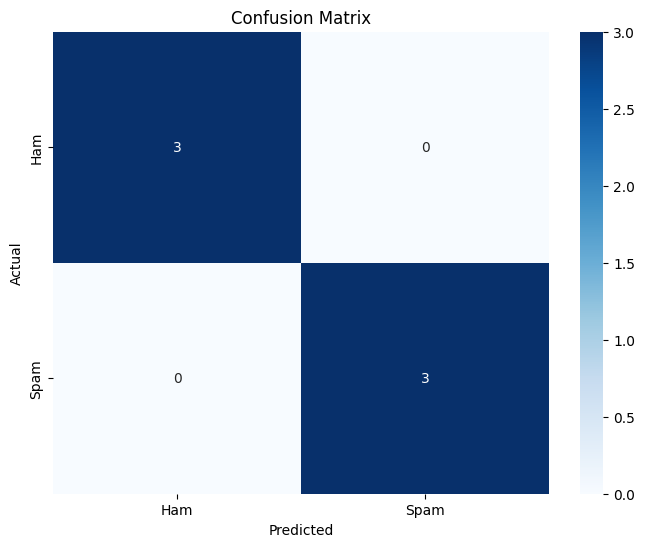

In [19]:
# Calculate confusion matrix
cm = confusion_matrix(known_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


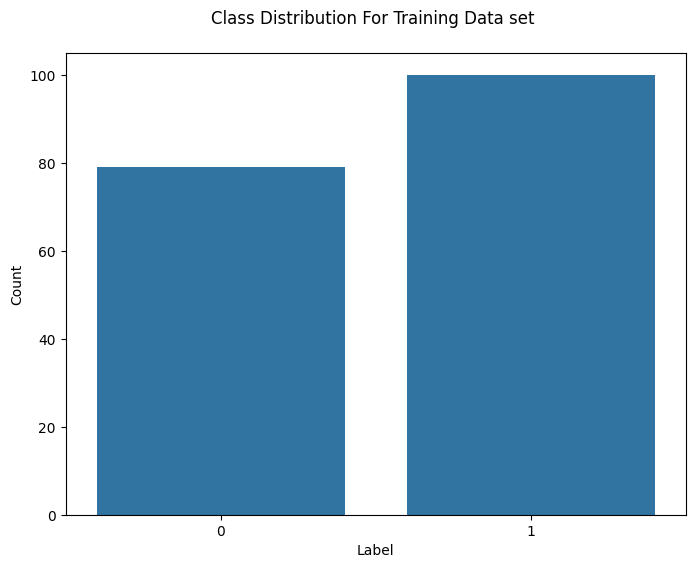

In [20]:

# To Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=cleaned_data)
plt.title('Class Distribution For Training Data set \n')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

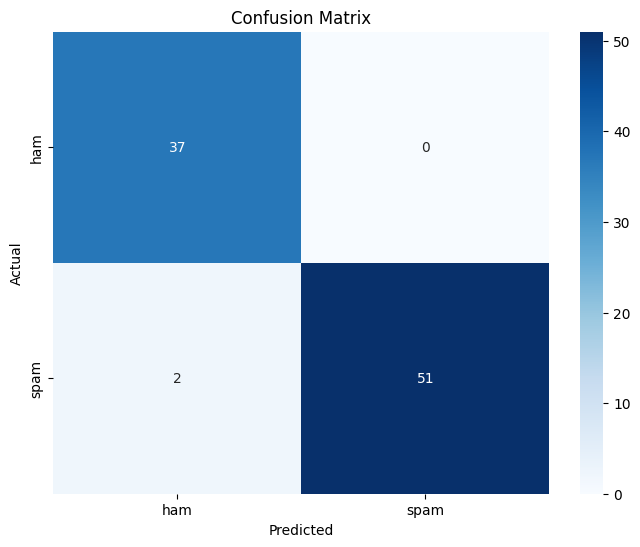

In [21]:

# Confusion matrix for test data
cm = confusion_matrix(Y_test, test_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


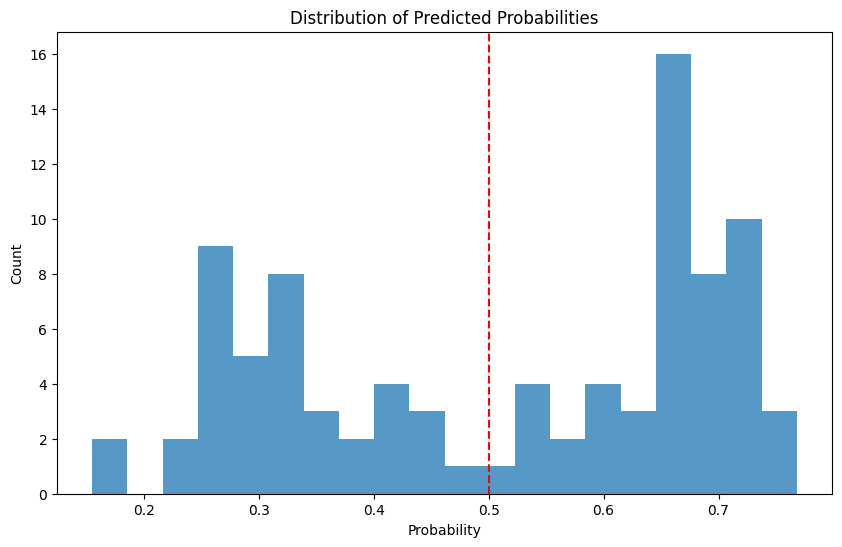

In [22]:
# Visualize prediction probabilities for test emails
probabilities = model.predict_proba(X_test_feature)[:, 1]  # Probability of being 'Ham'
plt.figure(figsize=(10, 6))
plt.hist(probabilities, bins=20, alpha=0.75)
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
